# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deploy de Modelos de Machine Learning</font>

# <font color='blue'>Amazon SageMaker</font>
## <font color='blue'>Lab</font>
### <font color='blue'>Deploy de Modelo Para Previsão de Doenças Usando Regsitros Médicos Eletrônicos</font>

## Parte 1 - Carga e Preparação dos Dados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.10


## Imports

In [2]:
# Imports
import random
import sagemaker
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Carga e Preparação dos Dados

In [3]:
from sagemaker import get_execution_role
role = get_execution_role()
print(role)

Couldn't call 'get_role' to get Role ARN from role name AmazonSageMaker-ExecutionRole-20210330T151228 to get Role path.
Assuming role was created in SageMaker AWS console, as the name contains `AmazonSageMaker-ExecutionRole`. Defaulting to Role ARN with service-role in path. If this Role ARN is incorrect, please add IAM read permissions to your role or supply the Role Arn directly.


arn:aws:iam::879456481532:role/service-role/AmazonSageMaker-ExecutionRole-20210330T151228


In [4]:
# Altere para o nome do seu bucket
s3_bucket = 'dsa-deploy-app'
prefix = 'dados'

In [5]:
raiz = 's3://{}/{}/'.format(s3_bucket, prefix)
print(raiz)

s3://dsa-deploy-app/dados/


In [6]:
df = pd.read_csv(raiz + 'dataset.csv')

In [7]:
df.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,No,16.192875,14.000000,19.000000,2.146700
1,No,13.383857,4.000000,3.000000,0.000000
2,No,28.554000,6.000000,12.000000,2.065591
3,No,3.536667,5.725649,1.635738,0.571832
4,No,16.561000,11.451297,8.728523,2.099426


In [8]:
df.shape

(9948, 5)

## Análise Exploratória

In [9]:
df.describe()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
count,9948.000000,9948.000000,9948.000000,9948.000000
mean,15.732258,5.881994,9.591503,1.021472
std,9.703593,5.896722,10.371288,1.231041
min,0.122124,0.000000,0.000000,0.000000
25%,7.455795,1.225649,2.000000,0.000000
50%,14.613946,4.000000,6.728523,0.836660
75%,22.918650,9.000000,14.000000,1.634458
max,50.900000,40.000000,141.000000,29.444864


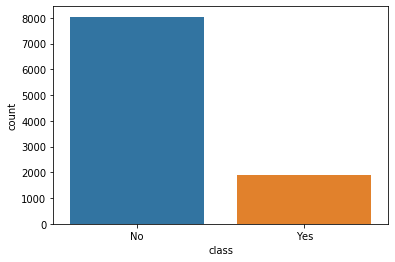

In [10]:
sns.countplot(df['class'], label = 'Count')
plt.show()

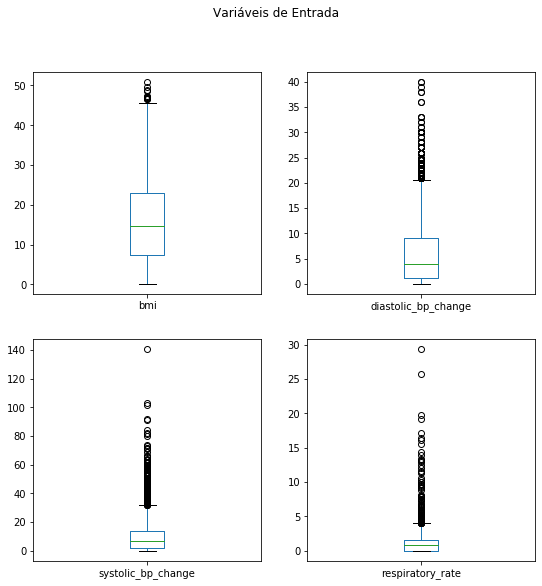

In [11]:
df.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (9,9), 
        title = 'Variáveis de Entrada')
plt.show()

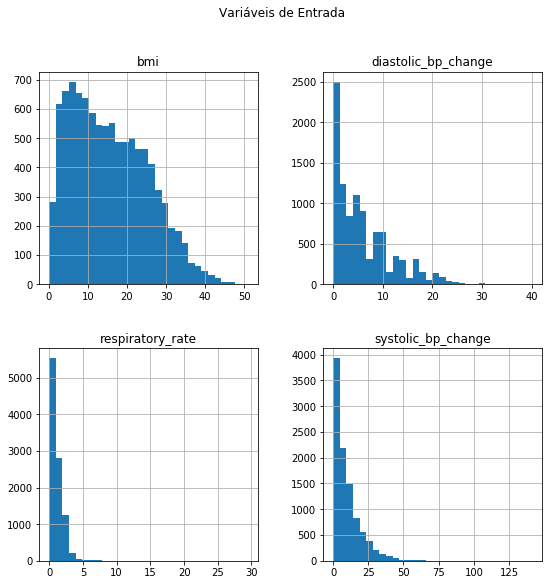

In [12]:
df.hist(bins = 30, figsize = (9,9))
pl.suptitle("Variáveis de Entrada")
plt.show()

## Pré-Processamento dos Dados

In [13]:
X = df[['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate']]
y = df['class']

In [14]:
# Encoder
label_encoder = LabelEncoder()
label_encoder.fit(['Yes', 'No'])
y = label_encoder.transform(y)

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 123)

In [17]:
X_treino.shape

(7461, 4)

In [18]:
X_teste.shape

(2487, 4)

In [19]:
# Padronização
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [20]:
# Dataframe de treino
X_treino = pd.DataFrame(X_treino, columns = ['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])
y_treino = pd.DataFrame(y_treino, columns = ['class'])
df_treino = pd.concat([y_treino, X_treino], axis = 1)
df_treino.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0,-1.483765,-1.003436,-0.927406,-0.817379
1,1,0.947850,-1.003436,-0.927406,-0.662177
2,0,-1.034765,2.206180,2.057467,-0.817379
3,0,-1.406122,0.179054,-0.445975,-0.817379
4,0,0.366195,-0.665582,0.228029,-0.431359


In [21]:
# Dataframe de teste
X_teste = pd.DataFrame(X_teste, columns = ['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])
y_teste = pd.DataFrame(y_teste, columns = ['class'])
df_teste = pd.concat([y_teste, X_teste], axis=1)
df_teste.head()

,class,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0,-0.940089,-0.403964,-0.279542,-0.817379
1,0,-0.502614,-0.665582,0.131742,-0.362450
2,0,1.078473,0.347981,0.228029,-0.817379
3,1,-0.636164,-0.251491,0.587034,-0.817379
4,1,-0.528479,2.037253,1.383463,0.185934


In [22]:
# Dataframe para batch normalization
batch_teste_df = df_teste.drop(['class'], axis = 1)
batch_teste_df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,-0.940089,-0.403964,-0.279542,-0.817379
1,-0.502614,-0.665582,0.131742,-0.362450
2,1.078473,0.347981,0.228029,-0.817379
3,-0.636164,-0.251491,0.587034,-0.817379
4,-0.528479,2.037253,1.383463,0.185934


In [23]:
# Salva os dados processados no S3
df_treino.to_csv(raiz + 'treino.csv', header = False, index = False)
df_treino.to_csv(raiz + 'treino_with_header.csv', header = True, index = False)
df_teste.to_csv(raiz + 'teste.csv', header = False, index = False)
batch_teste_df.to_csv(raiz + 'batch_teste.csv', header = False, index = False)

## Dados Sintéticos Para Simulação

In [24]:
def get_random_val():
    val = random.uniform(0, 1)
    return round(val, 6)

In [25]:
def generate_row():
    row = []
    for _ in range(4):
        row.append(get_random_val())
    return row  

In [26]:
def generate_dataset():
    rows = []
    for _ in range(20):
        rows.append(generate_row())
    return rows 

In [27]:
rows = generate_dataset() 

In [28]:
df = pd.DataFrame(rows, columns = ['bmi', 'diastolic_bp_change', 'systolic_bp_change', 'respiratory_rate'])

In [29]:
df.head()

,bmi,diastolic_bp_change,systolic_bp_change,respiratory_rate
0,0.111887,0.192892,0.763416,0.780763
1,0.222394,0.147775,0.215619,0.668130
2,0.128888,0.583998,0.910052,0.052230
3,0.089292,0.540225,0.468626,0.127176
4,0.852975,0.770675,0.048180,0.176119


In [30]:
df.to_csv(raiz + 'dados_sinteticos.csv', header = False, index = False)

## Fim